<h1>LeBron VS Jordan (Regular Season)</h1>

In [469]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

LeBron = pd.read_csv('lebron_career.csv')
Jordan = pd.read_csv('jordan_career.csv')


In [470]:
Jordan = Jordan.drop(["game", "date", "team","minus_plus","game_score"], axis = 1)
LeBron = LeBron.drop(["game", "date", "team","minus_plus","game_score"], axis = 1)

In [471]:
fgp_Jordan = Jordan.fg.sum() / Jordan.fga.sum()
tpp_Jordan = Jordan.three.sum() / Jordan.threeatt.sum()

fgp_LeBron = LeBron.fg.sum() / LeBron.fga.sum()
tpp_LeBron = LeBron.three.sum() / LeBron.threeatt.sum()

fgp = [fgp_Jordan*100,fgp_LeBron*100]
tpp = [tpp_Jordan*100,tpp_LeBron*100]

In [472]:
Jordan_means = Jordan[["pts","ast","trb","blk","stl"]].mean()
LeBron_means = LeBron[["pts","ast","trb","blk","stl"]].mean()
df1 = pd.DataFrame(LeBron_means.transpose())
df2 = pd.DataFrame(Jordan_means.transpose())

combined_means = {"Jordan": Jordan_means, "LeBron" : LeBron_means}
mean_df = pd.DataFrame(combined_means)

mean_df.index.name = 'Averages'
mean_df = mean_df.transpose()

mean_df["fgPercent"] = fgp
mean_df["3ptPercent"] = tpp

mean_df

Averages,pts,ast,trb,blk,stl,fgPercent,3ptPercent
Jordan,30.123134,5.254664,6.223881,0.833022,2.345149,49.688226,32.677165
LeBron,27.148410,7.163428,7.349823,0.782686,1.640459,50.376618,34.359526


In [473]:
mean_df["Athletes"] = ["Jordan", "LeBron"]
mean_df.columns = ["PPG","APG","RPG","SPG", "BPG", "FG%", "3PT%", "Athletes"]
mean_df

,PPG,APG,RPG,SPG,BPG,FG%,3PT%,Athletes
Jordan,30.123134,5.254664,6.223881,0.833022,2.345149,49.688226,32.677165,Jordan
LeBron,27.148410,7.163428,7.349823,0.782686,1.640459,50.376618,34.359526,LeBron


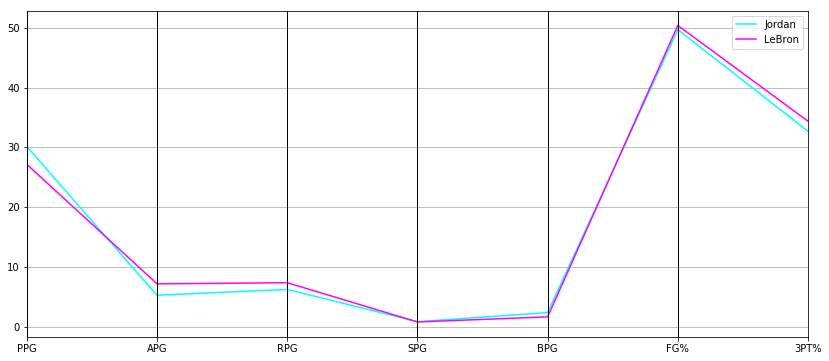

In [474]:
mpl.pyplot.figure(figsize=(14,6))

par = pd.plotting.parallel_coordinates(mean_df.iloc[:2], "Athletes", colormap=mpl.pyplot.cm.cool)


In [475]:
LeBron.tov.sum()/LeBron.shape[0]
Jordan.tov.sum()/Jordan.shape[0]


2.7276119402985075

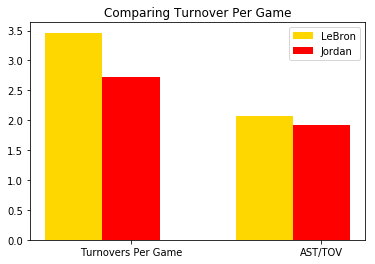

In [476]:
n_groups = 2
tov_LeBron = (LeBron.tov.sum()/LeBron.shape[0], mean_df.APG[1]/(LeBron.tov.sum()/LeBron.shape[0]))
tov_Jordan = (Jordan.tov.sum()/Jordan.shape[0], mean_df.APG[0]/(Jordan.tov.sum()/Jordan.shape[0]))

fig, ax = plt.subplots()
bar_width = 0.3
index = np.arange(n_groups)

plot1 = plt.bar(index, tov_LeBron,bar_width,
color='gold',
label='LeBron')

plot2 = plt.bar(index + bar_width, tov_Jordan,bar_width,
                color='red',
                label='Jordan')
plt.xticks(index + bar_width, ('Turnovers Per Game', 'AST/TOV'))
plt.legend()
plt.title("Comparing Turnover Per Game")

plt.show()

In [477]:
Jordan.age = Jordan['age'].str.replace('-','.')
LeBron.age = LeBron['age'].str.replace('-','.')

In [478]:
jordan_age_list = []
for age in Jordan.age:
    whole = age[0:2]
    decimil = str(float(age[3:6])/365)
    number = whole + decimil
    number = number[0:2] +number[3:8]
    number = float(number)
    jordan_age_list.append(number)
Jordan.age = jordan_age_list

In [479]:
bron_age_list = []
for age in LeBron.age:
    whole = age[0:2]
    decimil = str(float(age[3:6])/365)
    number = whole + decimil
    number = number[0:2] +number[3:8]
    number = float(number)
    bron_age_list.append(number)
LeBron.age = bron_age_list


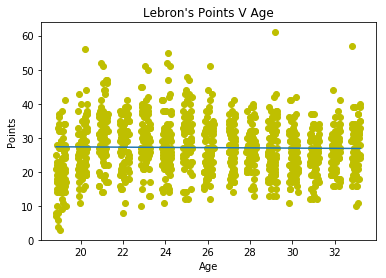

In [480]:
fit = np.polyfit(LeBron.age,LeBron.pts,1)
fit_fn = np.poly1d(fit)

plt.plot(LeBron.age,LeBron.pts, 'yo', LeBron.age, fit_fn(LeBron.age))

plt.title("Lebron's Points V Age")
plt.ylabel('Points')
plt.xlabel("Age")
plt.show()

# ppg(hat) =28.03709 + (-.03429)Age

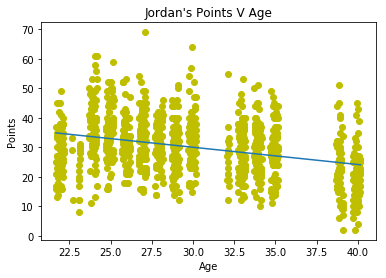

In [481]:
fit = np.polyfit(Jordan.age,Jordan.pts,1)
fit_fn = np.poly1d(fit)

plt.plot(Jordan.age,Jordan.pts, 'yo',Jordan.age, fit_fn(Jordan.age))

plt.title("Jordan's Points V Age")
plt.ylabel('Points')
plt.xlabel("Age")
plt.show()
# ppg(hat) = 47.579 + (-.58522443)Age
#p-value <.01

In [482]:
L_ages = [int(age) for age in LeBron.age]
L_pts = [pt for pt in LeBron.pts]
LeBron_age_pt_df = pd.DataFrame()
LeBron_age_pt_df["age"] = L_ages
LeBron_age_pt_df["pts"] = L_pts

L_ages = [age for age in set(LeBron_age_pt_df["age"])]
L_ages.sort()
L_pts = []

for age in L_ages:
    L_pts.append(LeBron_age_pt_df[LeBron_age_pt_df["age"]==age].mean()["pts"])
LeBron_mean_age_pt_df = pd.DataFrame()
LeBron_mean_age_pt_df["age"] = L_ages
LeBron_mean_age_pt_df["pts"] = L_pts
LeBron_mean_age_pt_df

,age,pts
0,18,20.161290
1,19,22.558442
2,20,29.320513
3,21,30.225000
4,22,27.907895
5,23,29.443038
6,24,28.726190
7,25,27.974026
8,26,28.729167
9,27,26.563218


In [483]:
J_ages = [int(age) for age in Jordan.age]
J_pts = [pt for pt in Jordan.pts]
Jordan_age_pt_df = pd.DataFrame()
Jordan_age_pt_df["age"] = J_ages
Jordan_age_pt_df["pts"] = J_pts

J_ages = [age for age in set(Jordan_age_pt_df["age"])]
J_ages.sort()
J_pts = []

for age in J_ages:
    J_pts.append(Jordan_age_pt_df[Jordan_age_pt_df["age"]==age].mean()["pts"])
Jordan_mean_age_pt_df = pd.DataFrame()
Jordan_mean_age_pt_df["age"] = J_ages
Jordan_mean_age_pt_df["pts"] = J_pts
Jordan_mean_age_pt_df

,age,pts
0,21,27.666667
1,22,28.705882
2,23,33.609375
3,24,34.662651
4,25,35.912500
5,26,31.566265
6,27,32.234568
7,28,30.771084
8,29,31.848101
9,30,32.827586


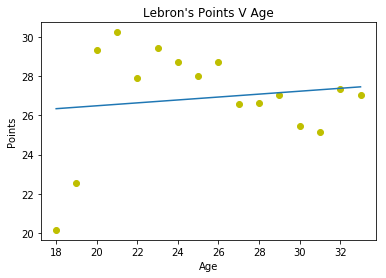

In [484]:
fit = np.polyfit(LeBron_mean_age_pt_df.age,LeBron_mean_age_pt_df.pts,1)
fit_fn = np.poly1d(fit)

plt.plot(LeBron_mean_age_pt_df.age,LeBron_mean_age_pt_df.pts, 'yo', LeBron_mean_age_pt_df.age, fit_fn(LeBron_mean_age_pt_df.age))

plt.title("Lebron's Points V Age")
plt.ylabel('Points')
plt.xlabel("Age")
plt.show()
#p-value too high

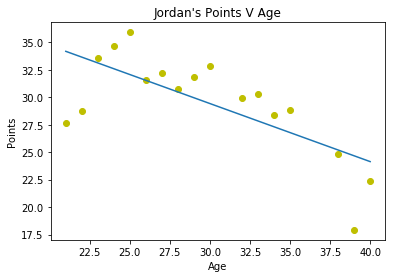

In [492]:
fit = np.polyfit(Jordan_mean_age_pt_df.age,Jordan_mean_age_pt_df.pts,1)
fit_fn = np.poly1d(fit)

plt.plot(Jordan_mean_age_pt_df.age, Jordan_mean_age_pt_df.pts,'yo', Jordan_mean_age_pt_df.age, fit_fn(Jordan_mean_age_pt_df.age))

plt.title("Jordan's Points V Age")
plt.ylabel('Points')
plt.xlabel("Age")
plt.show()

(0.13538613320269335, 0.6171258938184874)